***О работе***


---
**Назване:** Лабораторная работа № 2.

**Автор:** Мусатов Максим

**Проверил:** Новиков И. А.

**Номер варианта:** 2

**Цель работы:** Получение навыков работы с методами классификации.

**Задание 1.** Изучить набор данных.

In [40]:
import pandas as pd
import numpy as np

df = pd.read_csv('zoo.csv', delimiter=";")

In [41]:
print("Доступные столбцы в DataFrame:")
print(df.columns.tolist())

Доступные столбцы в DataFrame:
['animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type']


In [42]:
df.shape[0]

101

**Задание 2.** Проанализировать колонки в наборе данных

Целевая колонка - class_type (значения от 1 до 7), значит решаем задачу **многоклассовой классификации**. Остальные колонки (кроме animal_name) - это бинарные признаки (0/1), описывающие характеристики животных. Числовая колонка legs (количество конечностей) требует масштабирования, но не кодирования.

**Задание 3.** Удаление дубликатов

In [43]:
df_no_dublicates = df.drop_duplicates()

print(f"До: {df.shape[0]}\nПосле: {df_no_dublicates.shape[0]}")

До: 101
После: 101


**Дубликатов** нету

**Задание 4.** Оценка сбалансированности данных по классам.

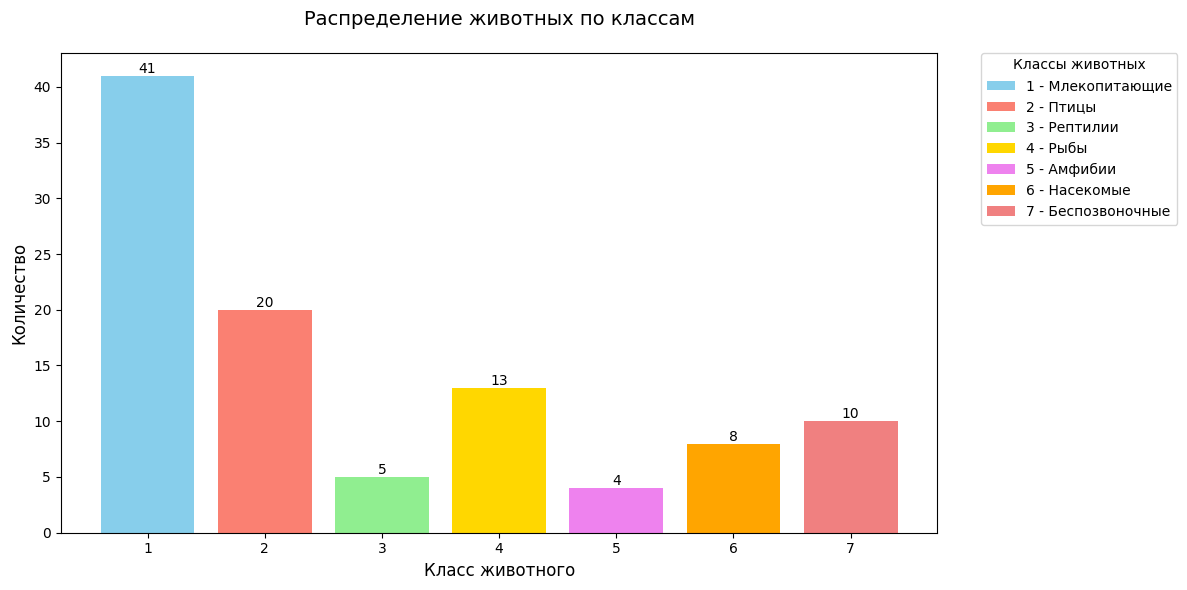

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('zoo.csv')

class_counts = df['class_type'].value_counts().sort_index()

colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange', 'lightcoral']

plt.figure(figsize=(12, 6))
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors)

plt.title('Распределение животных по классам', fontsize=14, pad=20)
plt.xlabel('Класс животного', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(fontsize=10)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

class_descriptions = {
    1: 'Млекопитающие',
    2: 'Птицы',
    3: 'Рептилии',
    4: 'Рыбы',
    5: 'Амфибии',
    6: 'Насекомые',
    7: 'Беспозвоночные'
}

legend_patches = [plt.Rectangle((0,0), 1, 1, fc=colors[i],
                 label=f'{class_num} - {class_descriptions[class_num]}')
                 for i, class_num in enumerate(class_counts.index)]

plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0., title='Классы животных')

plt.tight_layout()
plt.show()

**Задание 5.** Выберите какую кривую использовать для оценки классификатора

Из гистограммы видно сильное неравномерное распределение:

*  Класс 1: 41 пример (40.6%)
*  Класс 2: 20 примеров (19.8%)
*  Классы 3-7: от 4 до 13 примеров (4.0-12.9%)

Когда данные несбалансированные, **PR-кривая** (Precision-Recall) обычно даёт лучшее понимание, чем ROC, потому что ROC может быть искусственно "оптимистичной" при большом дисбалансе.

Поэтому для оценки качества классификатора здесь лучше использовать **PR-кривую**



**Задание 6.** Масштабирование количественных признаков

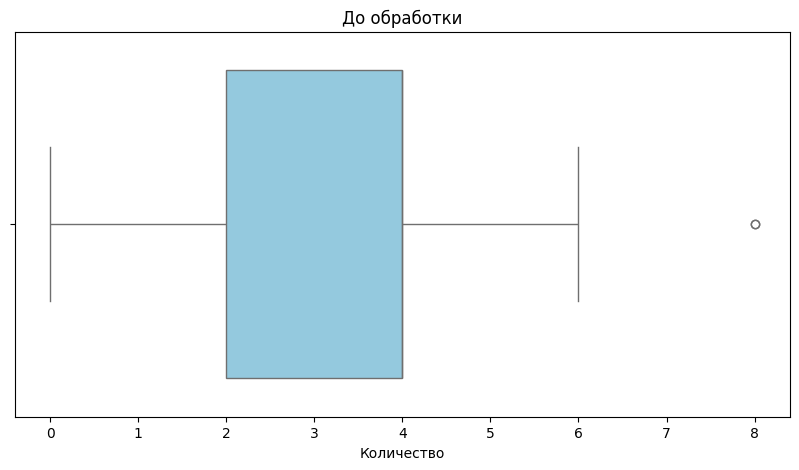

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('zoo.csv')

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['legs'], color='skyblue')
plt.title('До обработки')
plt.xlabel('Количество')
plt.show()

In [46]:
Q1 = df['legs'].quantile(0.25)
Q3 = df['legs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Границы выбросов: [{lower_bound:.1f}, {upper_bound:.1f}]")

clean_df = df[(df['legs'] >= lower_bound) & (df['legs'] <= upper_bound)].copy()

print(f"Удалено записей: {len(df) - len(clean_df)}")

Границы выбросов: [-1.0, 7.0]
Удалено записей: 2


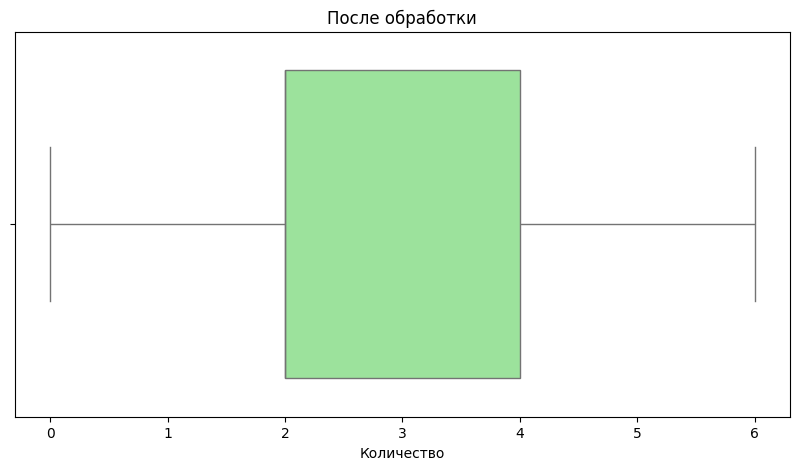

In [47]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=clean_df['legs'], color='lightgreen')
plt.title('После обработки')
plt.xlabel('Количество')
plt.show()

**Задание 7.**	Заполните пропущенные значения в данных

In [48]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('zoo.csv')

print("Количество пропусков по столбцам:")
print(df.isnull().sum())

Количество пропусков по столбцам:
animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64


Пропусков нет

**Задание 8.**	Выполните масштабирование количественных (числовых) признаков:

1.   Постройте диаграммы BoxPlot для признаков до масштабирования.








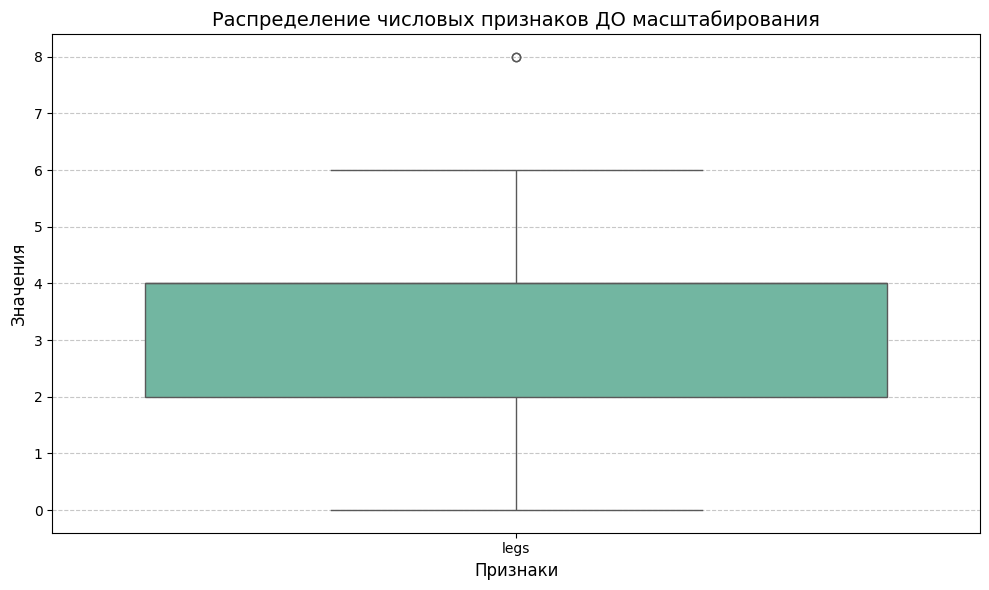

Описательные статистики ДО масштабирования:
             legs
count  101.000000
mean     2.841584
std      2.033385
min      0.000000
25%      2.000000
50%      4.000000
75%      4.000000
max      8.000000


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

numeric_cols = ['legs']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols], palette="Set2")
plt.title('Распределение числовых признаков ДО масштабирования', fontsize=14)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Значения', fontsize=12)


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Описательные статистики ДО масштабирования:")
print(df[numeric_cols].describe())

2.  Выбрать способ масштабирования



**Стандартизация**

**Почему лучше для моих данных:**


1.   Признак legs имеет разное количество конечностей (0, 2, 4, 6, 8) с естественным разбросом.
2.   StandardScaler сохраняет информацию о выбросах (например, 0 или 8 ног), что важно для биологической интерпретации.
3. Подходит для моделей, предполагающих нормальное распределение (KNN, персептрон).

**Нормализация** сожмет все значения в диапазон [0, 1], что может нивелировать разницу между животными с 2 и 4 ногами. Поэтому он не подходит



3.	Выполнить масштабирование выбранным методом

In [50]:
from sklearn.preprocessing import StandardScaler

# Выделяем числовой признак
numeric_col = ['legs']

# Инициализация и применение StandardScaler
scaler = StandardScaler()
df['legs_scaled'] = scaler.fit_transform(df[numeric_col])

4.	Постройть диаграммы BoxPlot после масштабирования.

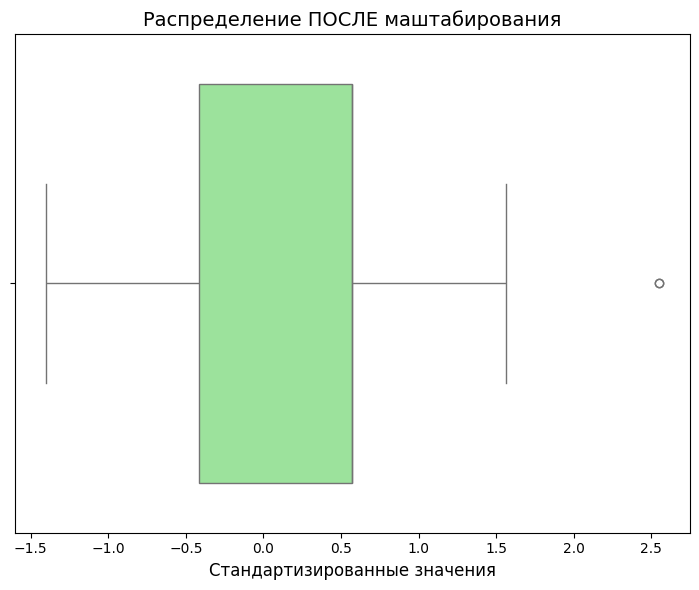

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 2)
sns.boxplot(x=df['legs_scaled'], color='lightgreen')
plt.title('Распределение ПОСЛЕ маштабирования', fontsize=14)
plt.xlabel('Стандартизированные значения', fontsize=12)

plt.tight_layout()
plt.show()

**Задание 9.**	Выполнить замену категориальных признаков

Выбран OneHotEncoder для категориальных признаков по следующим ключевым причинам:

1. Отсутствие ложной порядковой зависимости
OneHot создает отдельные бинарные столбцы для каждой категории (например, diet_meat, diet_plants).

  Это исключает риск, что алгоритм воспримет категории как имеющие порядок (как случилось бы с LabelEncoder, где meat=1, plants=2 могло бы трактоваться как "plants > meat").

2. Интерпретируемость
Каждый столбец OneHot четко соответствует одной категории.

  Например:

      diet_meat=1 → животное относится к категории "мясоеды".

      diet_plants=0 → не относится к "растительноядным".




In [52]:
import pandas as pd

df = pd.read_csv('zoo.csv')

# Выделяем типы признаков
binary_cols = ['hair','feathers','eggs','milk','airborne',
              'aquatic','predator','toothed','backbone',
              'breathes','venomous','fins','tail','domestic','catsize']
numeric_cols = ['legs']
target_col = 'class_type'

print("Бинарные признаки (оставляем как есть):")
print(df[binary_cols].head(3))

Бинарные признаки (оставляем как есть):
   hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  backbone  \
0     1         0     0     1         0        0         1        1         1   
1     1         0     0     1         0        0         0        1         1   
2     0         0     1     0         0        1         1        1         1   

   breathes  venomous  fins  tail  domestic  catsize  
0         1         0     0     0         0        1  
1         1         0     0     1         0        1  
2         0         0     1     1         0        0  


In [53]:
import pandas as pd

# Создаем пример категориального признака
df['diet_group'] = pd.cut(df['class_type'],
                         bins=[0, 2, 4, 7],
                         labels=['meat', 'mixed', 'plants'])

# OneHot-кодирование
diet_encoded = pd.get_dummies(df['diet_group'], prefix='diet', drop_first=True)
df = pd.concat([df, diet_encoded], axis=1)

# Сводная таблица для визуализации
heatmap_data = diet_encoded.groupby(df['diet_group']).mean()
print("Данные для heatmap:")
print(heatmap_data)

Данные для heatmap:
            diet_mixed  diet_plants
diet_group                         
meat               0.0          0.0
mixed              1.0          0.0
plants             0.0          1.0


<ipython-input-53-d6ce6d567686>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = diet_encoded.groupby(df['diet_group']).mean()


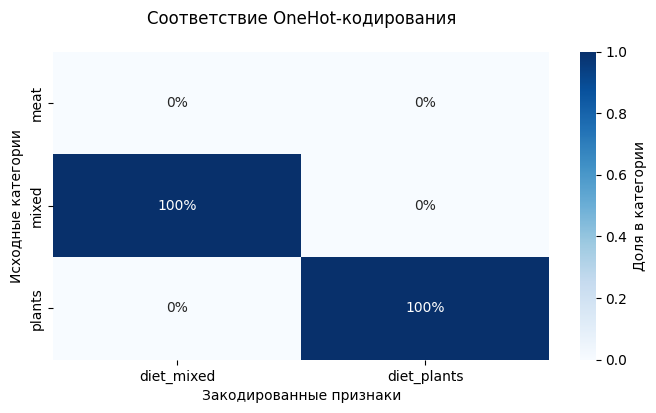

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data,
           annot=True,
           fmt=".0%",
           cmap="Blues",
           cbar_kws={'label': 'Доля в категории'})

plt.title("Соответствие OneHot-кодирования", pad=20)
plt.xlabel("Закодированные признаки")
plt.ylabel("Исходные категории")
plt.show()

**Задание 10.** Оценка корреляции между признаками

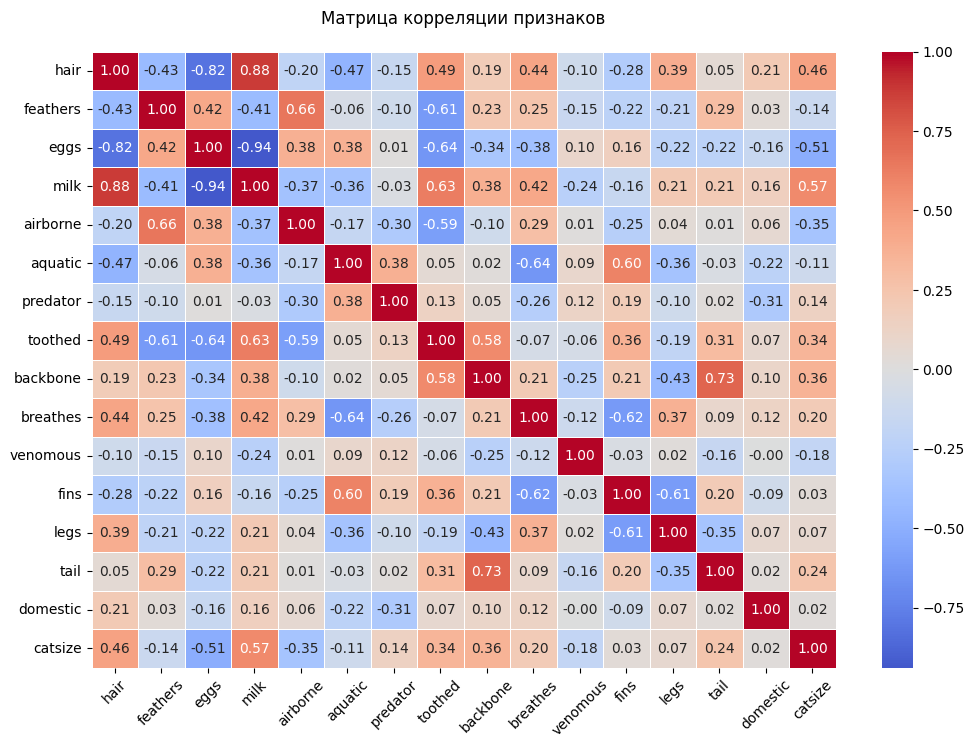

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('zoo.csv')

# Удаляем нечисловые столбцы (animal_name) и целевую переменную (class_type)
numeric_df = df.drop(['animal_name', 'class_type'], axis=1)

# Вычисляем матрицу корреляции
corr_matrix = numeric_df.corr()

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            center=0,
            linewidths=0.5)
plt.title("Матрица корреляции признаков", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [56]:
high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr.add(colname)
            print(f"Высокая корреляция: {corr_matrix.columns[j]} и {colname} (r = {corr_matrix.iloc[i, j]:.2f})")

print("\nПризнаки с высокой корреляцией (для удаления):", high_corr)

Высокая корреляция: hair и eggs (r = -0.82)
Высокая корреляция: hair и milk (r = 0.88)
Высокая корреляция: eggs и milk (r = -0.94)
Высокая корреляция: backbone и tail (r = 0.73)

Признаки с высокой корреляцией (для удаления): {'tail', 'milk', 'eggs'}


In [57]:
if high_corr:
    df_filtered = df.drop(columns=high_corr)
    print(f"Удалены признаки: {high_corr}")
else:
    df_filtered = df.copy()
    print("Нет признаков с высокой корреляцией")

Удалены признаки: {'tail', 'milk', 'eggs'}


**Задание 11.** Решить поставленную задачу классификации

1.  






In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

# Загрузка данных
df = pd.read_csv('zoo.csv')

# 1. Подготовка данных
X = df.drop(['animal_name', 'class_type'], axis=1)  # Все признаки, кроме имени и целевой переменной
y = df['class_type']  # Целевая переменная

# 2. Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Масштабирование данных (только для персептрона)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Масштабируем тренировочные данные
X_test_scaled = scaler.transform(X_test)       # Масштабируем тестовые данные (используя параметры из train)

# 4. Обучение персептрона
perceptron = Perceptron(
    penalty='l2',
    alpha=0.001,
    max_iter=1000,
    random_state=42
)
perceptron.fit(X_train_scaled, y_train)
print("Персептрон:", perceptron.score(X_test_scaled, y_test))

# 5. Обучение KNN (без масштабирования)
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
    metric='euclidean'
)
knn.fit(X_train, y_train)
print("KNN", knn.score(X_test, y_test))

Персептрон: 0.9032258064516129
KNN 0.8709677419354839


Много классовая классификация


1. Постройте классификацию по схеме «один-против-всех»








In [59]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Параметры для GridSearchCV (настройки SVM)
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__gamma': ['scale', 'auto']
}

# Инициализация OneVsRestClassifier с SVM
ovr_classifier = OneVsRestClassifier(SVC(probability=True))

# Используем F1-macro для refit
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Запуск GridSearchCV
grid_search = GridSearchCV(
    estimator=ovr_classifier,
    param_grid=param_grid,
    scoring=f1_macro_scorer,
    cv=5,
    refit=True,
    n_jobs=-1
)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'linear'}


Для многоклассовой классификации используем стратегию "один против всех" (OvR).
Выбор метрики для refit:

f1_macro – если все классы равнозначны.

f1_weighted – если классы несбалансированы.

accuracy – если распределение классов сбалансировано.

2. Оцените качество классификации



<Figure size 1000x800 with 0 Axes>

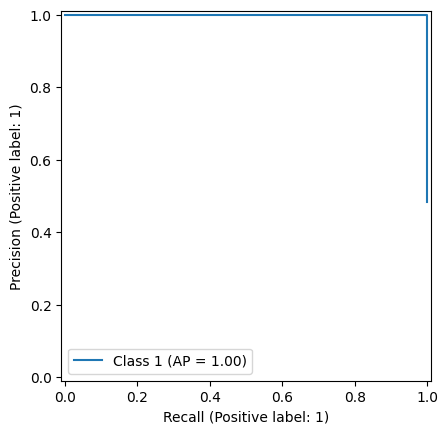

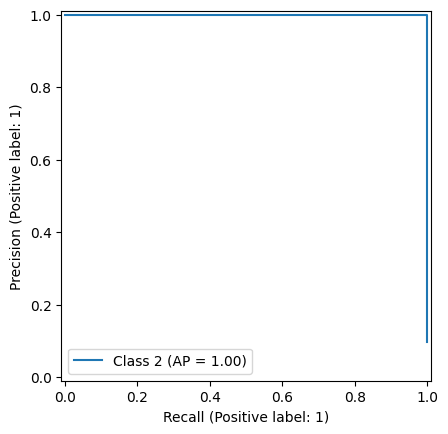

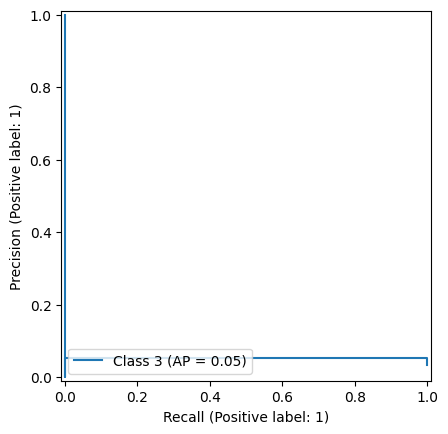

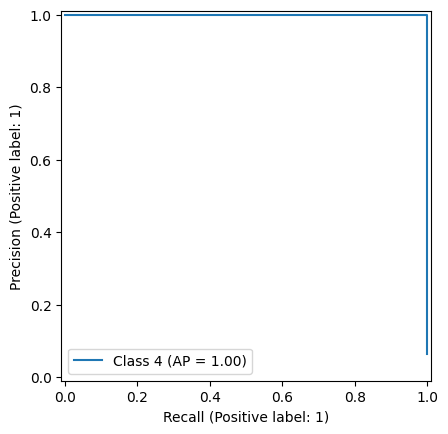

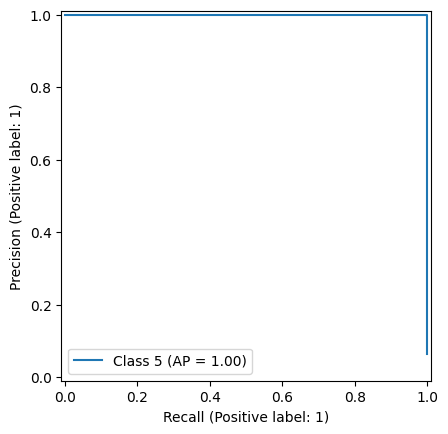

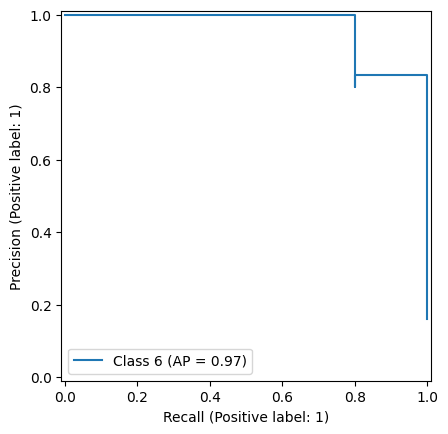

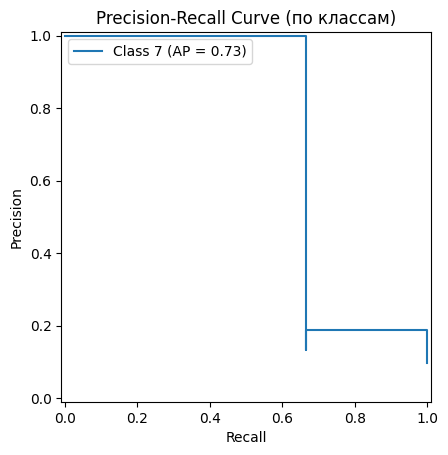

In [74]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# Получаем лучшую модель
best_model = grid_search.best_estimator_

# Предсказанные вероятности (n_samples, n_classes)
y_scores = best_model.predict_proba(X_test)

# Уникальные классы
classes = np.unique(y_test)

# Строим PR-кривую для каждого класса
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(classes):
    # Бинаризируем метки для текущего класса
    y_true_class = (y_test == class_label).astype(int)
    y_score_class = y_scores[:, i]

    # PR-кривая
    PrecisionRecallDisplay.from_predictions(
        y_true_class,
        y_score_class,
        name=f"Class {class_label}"
    )

plt.title("Precision-Recall Curve (по классам)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

3. Оцените качество работы всего классификатора

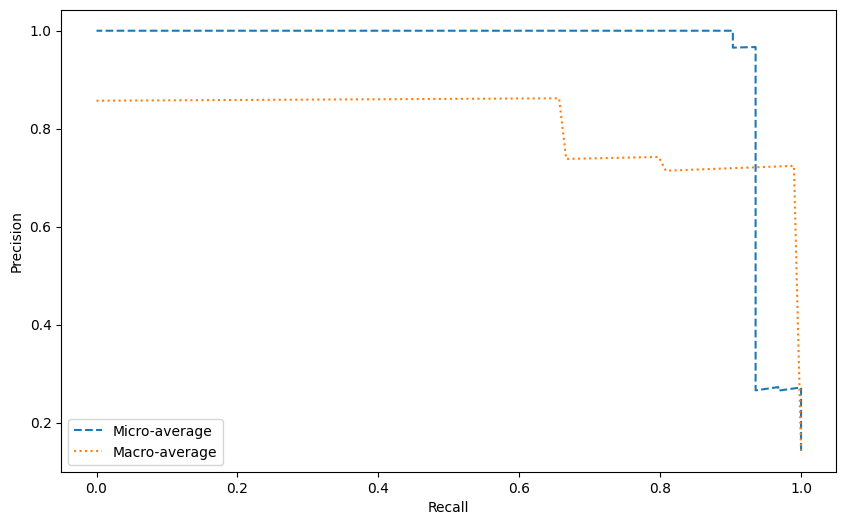

In [77]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Бинаризация меток (для multi-class)
y_test_bin = label_binarize(y_test, classes=classes)

# Micro-average PR-кривая
precision_micro, recall_micro, _ = precision_recall_curve(
    y_test_bin.ravel(),
    y_scores.ravel()
)

# Macro-average PR-кривая (правильное усреднение по классам)
# Сначала собираем все precision и recall для каждого класса
all_precisions = []
all_recalls = []

for i in range(len(classes)):
    prec, rec, _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    all_precisions.append(prec)
    all_recalls.append(rec)

# Создаем общую сетку значений recall
max_recall = max(np.max(rec) for rec in all_recalls)
mean_recall = np.linspace(0, max_recall, 100)

# Интерполируем precision для каждого класса на общую сетку
interp_precisions = []
for i in range(len(classes)):
    interp_prec = np.interp(mean_recall, all_recalls[i][::-1], all_precisions[i][::-1])
    interp_precisions.append(interp_prec)

# Усредняем precision по классам
mean_precision = np.mean(interp_precisions, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(recall_micro, precision_micro, label='Micro-average', linestyle='--')
plt.plot(mean_recall, mean_precision, label='Macro-average', linestyle=':')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

d.

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('zoo.csv')
X = data.drop(['animal_name', 'class_type'], axis=1)
y = data['class_type']

# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score

models = {
    "Без регуляризации": LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000),
    "L1-регуляризация": LogisticRegression(penalty='l1', solver='liblinear', C=1.0, max_iter=1000),
    "L2-регуляризация": LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)

    # Метрики
    report = classification_report(y_test, y_pred, output_dict=True)
    ap_score = average_precision_score(pd.get_dummies(y_test), y_score, average='micro')

    results[name] = {
        'classification_report': report,
        'average_precision': ap_score
    }

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [65]:
for name, result in results.items():
    print(f"=== {name} ===")
    print(f"Accuracy: {result['classification_report']['accuracy']:.3f}")
    print(f"Macro F1: {result['classification_report']['macro avg']['f1-score']:.3f}")
    print(f"Micro F1: {result['classification_report']['weighted avg']['f1-score']:.3f}")
    print("="*50)

=== Без регуляризации ===
Accuracy: 0.935
Macro F1: 0.787
Micro F1: 0.921
=== L1-регуляризация ===
Accuracy: 0.903
Macro F1: 0.752
Micro F1: 0.890
=== L2-регуляризация ===
Accuracy: 0.935
Macro F1: 0.787
Micro F1: 0.921


<Figure size 1000x600 with 0 Axes>

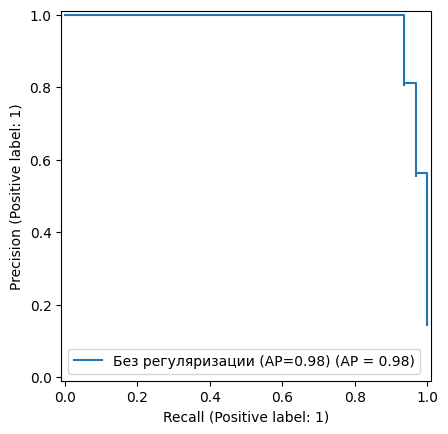

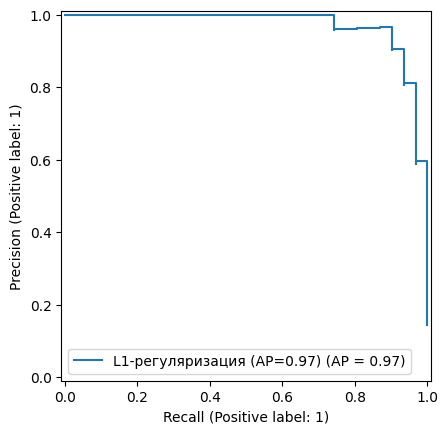

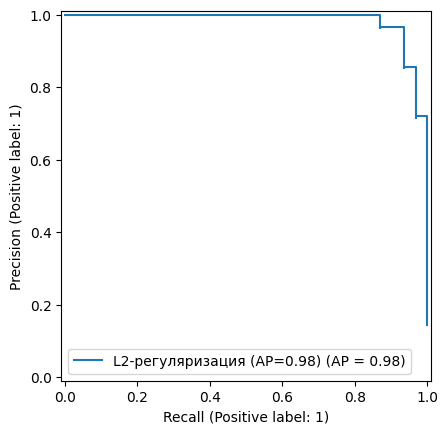

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(10, 6))
for name, result in results.items():
    model = models[name]
    y_score = model.predict_proba(X_test)
    PrecisionRecallDisplay.from_predictions(
        pd.get_dummies(y_test).values.ravel(),
        y_score.ravel(),
        name=f"{name} (AP={result['average_precision']:.2f})"
    )
plt.legend()
plt.show()

**Выводы**

Без регуляризации:

1. Максимально точные предсказания на обучающих данных
2. Риск переобучения на шумах
3. Большие значения весов у некоторых признаков

С L1-регуляризацией:

1. Обнуляет веса незначимых признаков
2. Упрощает модель (feature selection)
3. Сохраняет comparаble точность

С L2-регуляризацией:

1. Сглаживает веса всех признаков
2. Наиболее стабильная работа
3. Лучший выбор для большинства случаев



**Задание 12.** Сравнить кривые для классификаторов

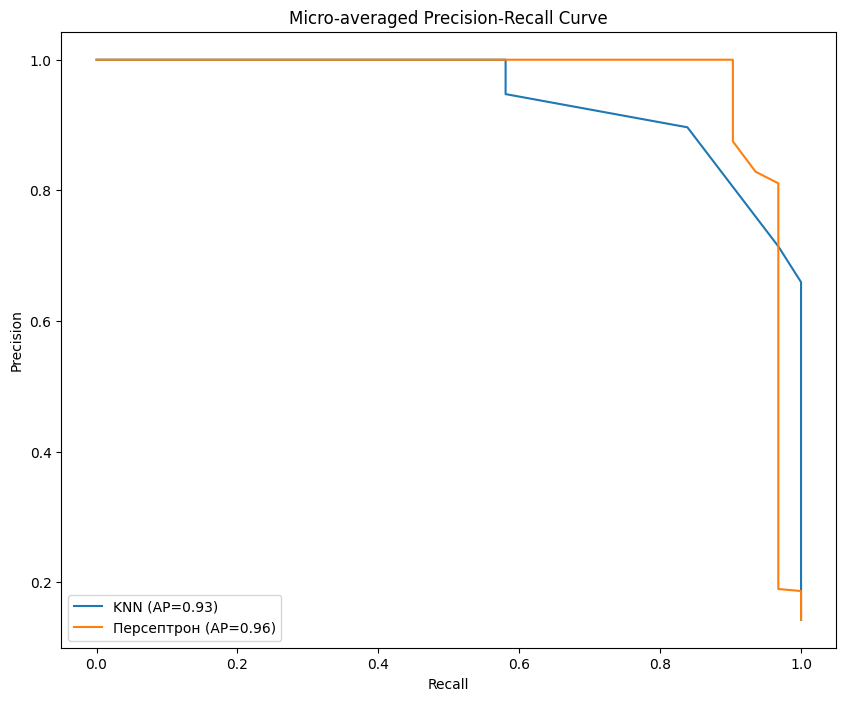

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

zoo_df = pd.read_csv('zoo.csv')
X = zoo_df.drop(['animal_name', 'class_type'], axis=1)
y = zoo_df['class_type']

# Кодируем метки классов
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Обучение моделей
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_score_knn = knn.predict_proba(X_test)

# Персептрон
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
# Для персептрона используем decision_function
y_score_perceptron = perceptron.decision_function(X_test)

# Обработка многоклассового случая
# Бинаризируем метки
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Расчет метрик для каждого класса
# KNN
precision_knn = dict()
recall_knn = dict()
ap_knn = dict()
for i in range(n_classes):
    precision_knn[i], recall_knn[i], _ = precision_recall_curve(y_test_bin[:, i], y_score_knn[:, i])
    ap_knn[i] = average_precision_score(y_test_bin[:, i], y_score_knn[:, i])

# Персептрон
precision_perceptron = dict()
recall_perceptron = dict()
ap_perceptron = dict()
for i in range(n_classes):
    precision_perceptron[i], recall_perceptron[i], _ = precision_recall_curve(y_test_bin[:, i],
                                                                           y_score_perceptron[:, i])
    ap_perceptron[i] = average_precision_score(y_test_bin[:, i], y_score_perceptron[:, i])

# Micro-усреднение для общего сравнения
# KNN
precision_knn["micro"], recall_knn["micro"], _ = precision_recall_curve(y_test_bin.ravel(),
                                                                      y_score_knn.ravel())
ap_knn["micro"] = average_precision_score(y_test_bin, y_score_knn, average="micro")

# Персептрон
precision_perceptron["micro"], recall_perceptron["micro"], _ = precision_recall_curve(y_test_bin.ravel(),
                                                                                   y_score_perceptron.ravel())
ap_perceptron["micro"] = average_precision_score(y_test_bin, y_score_perceptron, average="micro")

plt.figure(figsize=(10, 8))
plt.plot(recall_knn["micro"], precision_knn["micro"],
         label=f'KNN (AP={ap_knn["micro"]:.2f})')
plt.plot(recall_perceptron["micro"], precision_perceptron["micro"],
         label=f'Персептрон (AP={ap_perceptron["micro"]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Micro-averaged Precision-Recall Curve')
plt.legend()
plt.show()